# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [1]:
import os
import pandas as pd
import numpy as np
import re
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
data311 = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9', \
                      usecols = ['Unique Key','Agency', 'Descriptor', 'Complaint Type', 
                                'Community Board', 'Borough', 'Resolution Description'])
data311.head()

,Unique Key,Agency,Complaint Type,Descriptor,Resolution Description,Community Board,Borough
0,31911011,DOT,Street Condition,Pothole,NaN,13 BROOKLYN,BROOKLYN
1,31908754,CHALL,Opinion for the Mayor,HOUSING,Your comments have been submitted to the Mayor...,0 Unspecified,Unspecified
2,31910423,DPR,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,The Department of Parks and Recreation usually...,18 BROOKLYN,BROOKLYN
3,31909924,NYPD,Illegal Parking,Blocked Hydrant,Your complaint has been received by the Police...,12 BROOKLYN,BROOKLYN
4,31913310,HRA,Benefit Card Replacement,Medicaid,The Human Resources Administration received yo...,0 Unspecified,Unspecified


In [3]:
len(data311)

10187766

In [4]:
data311.dtypes

Unique Key                 int64
Agency                    object
Complaint Type            object
Descriptor                object
Resolution Description    object
Community Board           object
Borough                   object
dtype: object

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc.

In [5]:
# Check if all Boroughs and Community Districts are represented in the Data 
print "Borough:"
print data311.Borough.unique()

Borough:
['BROOKLYN' 'Unspecified' 'STATEN ISLAND' 'MANHATTAN' 'BRONX' 'QUEENS']


It can be seen that 'Unspecified' is not a name of Borough. 

In [6]:
comm_district = data311['Community Board'].unique()
print "Community Districts:"
print comm_district
print "\n Total Number of community districts: " + str(len(comm_district))

Community Districts:
['13 BROOKLYN' '0 Unspecified' '18 BROOKLYN' '12 BROOKLYN'
 '02 STATEN ISLAND' '08 MANHATTAN' '06 BROOKLYN' '10 BRONX' '06 MANHATTAN'
 '04 BROOKLYN' '04 QUEENS' '09 MANHATTAN' '14 BROOKLYN' '05 MANHATTAN'
 '02 MANHATTAN' '10 QUEENS' '07 QUEENS' '02 QUEENS' '11 BROOKLYN'
 '05 QUEENS' '05 BROOKLYN' '09 QUEENS' '12 MANHATTAN' '01 BROOKLYN'
 '11 MANHATTAN' '03 BRONX' '03 STATEN ISLAND' '08 BROOKLYN' '03 BROOKLYN'
 '07 MANHATTAN' '10 MANHATTAN' '04 BRONX' '01 MANHATTAN' '07 BRONX'
 '09 BRONX' '03 MANHATTAN' '13 QUEENS' '02 BRONX' '12 QUEENS' '16 BROOKLYN'
 '08 QUEENS' '04 MANHATTAN' '14 QUEENS' '10 BROOKLYN' '11 QUEENS'
 '06 BRONX' '08 BRONX' '05 BRONX' '15 BROOKLYN' '02 BROOKLYN' '12 BRONX'
 '03 QUEENS' '06 QUEENS' '01 STATEN ISLAND' '01 BRONX' '01 QUEENS'
 '17 BROOKLYN' '11 BRONX' 'Unspecified QUEENS' '09 BROOKLYN'
 'Unspecified MANHATTAN' 'Unspecified BROOKLYN' '07 BROOKLYN'
 'Unspecified BRONX' '64 MANHATTAN' '81 QUEENS' '55 BROOKLYN' '83 QUEENS'
 'Unspecified STATE

In [7]:
print "Unique values: " + str(len(data311.drop_duplicates()))
print "Number of records: " + str(len(data311))

Unique values: 10187766
Number of records: 10187766


The number of unique values equals number of records, thus there are no duplicate records in the dataset.

In [8]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.

In [9]:
data311.Borough.value_counts()

BROOKLYN         2831932
QUEENS           2189760
MANHATTAN        1900005
BRONX            1665625
Unspecified      1109446
STATEN ISLAND     490998
Name: Borough, dtype: int64

In [10]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

# code below is to do a quick peek for Descriptor and Complaint type
data_2columns = data311.loc[:,['Descriptor','Complaint Type','Resolution Description']]
data_2columns[~data_2columns.isnull().any(axis=1)].head(3)

,Descriptor,Complaint Type,Resolution Description
1,HOUSING,Opinion for the Mayor,Your comments have been submitted to the Mayor...
2,Trees and Sidewalks Program,Root/Sewer/Sidewalk Condition,The Department of Parks and Recreation usually...
3,Blocked Hydrant,Illegal Parking,Your complaint has been received by the Police...


In [11]:
# looks like descriptor is the specific description of complaint type
# To know what kind of descriptors a complaint type might has, aggregate the data by complaint type below
data_2columns.groupby('Complaint Type')['Descriptor'].apply(list)

Complaint Type
AGENCY                               [HOUSING QUALITY STANDARDS, HOUSING QUALITY ST...
APPLIANCE                            [ELECTRIC/GAS RANGE, ELECTRIC/GAS RANGE, ELECT...
Adopt-A-Basket                       [10A Adopt-A-Basket, 10A Adopt-A-Basket, 10A A...
Advocate-Commercial Exemptions                   [Commercial Not For Profit Exemption]
Advocate-Personal Exemptions         [Personal SCHE Exemption, Personal DHE Exempti...
Advocate-Prop Class Incorrect                             [Property Misclassification]
Advocate-SCRIE/DRIE                  [DRIE, SCRIE Initial Application, DRIE, DRIE, ...
Agency Issues                        [New Tree Complaint, Enforcement Issue, 311 On...
Air Quality                          [Air: Odor/Fumes, Restaurant (AD2), Air: Smoke...
Animal Abuse                         [Neglected, Neglected, No Shelter, Other (comp...
Animal Facility - No Permit          [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Animal in a Park            

In my opinion, we can replace nan in descriptor with complaint type

In [12]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

# marker below are all unplausible community districts: those with unspecified name and number greater than 18
marker = []
for i in range(len(comm_district)):
    try:
        elem = int(comm_district[i][:2])
        if (elem > 18) | (elem == 0):
            marker.append(comm_district[i])
    except:
        marker.append(comm_district[i])

In [13]:
print (marker)

['0 Unspecified', 'Unspecified QUEENS', 'Unspecified MANHATTAN', 'Unspecified BROOKLYN', 'Unspecified BRONX', '64 MANHATTAN', '81 QUEENS', '55 BROOKLYN', '83 QUEENS', 'Unspecified STATEN ISLAND', '28 BRONX', '80 QUEENS', '26 BRONX', '95 STATEN ISLAND', '82 QUEENS', '27 BRONX', '56 BROOKLYN', '84 QUEENS']


In [14]:
# Drop the marked districts
complaint_data = data311[~data311['Community Board'].isin(marker)].copy()

In [15]:
len(complaint_data['Community Board'].unique())

59

#### Now, we have a clean dataframe- **complaint_data**  with the correct(59) number of unique community districts

In [16]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
complaint_numbers = complaint_data.groupby('Community Board').count()['Unique Key']

In [17]:
complaint_numbers = pd.DataFrame(complaint_numbers.sort_values(ascending=False))
complaint_numbers = complaint_numbers.reset_index()
complaint_numbers.rename(columns={'Unique Key':'complaint numbers'}, inplace=True)

In [18]:
# community districts sorted by complaints number
complaint_numbers.head()

,Community Board,complaint numbers
0,12 MANHATTAN,268053
1,12 QUEENS,229383
2,03 BROOKLYN,197306
3,07 QUEENS,195961
4,17 BROOKLYN,191720


### Result: Community District Manhattan 12 has the highest number of complaints

In [19]:
# Safe reduced data frame (Community District level)
PUIdata = os.getenv('PUIDATA')
complaint_numbers.to_csv(PUIdata + '/Complaint_Numbers.csv')

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data.

In [20]:
# Population by Community District
data_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")

In [21]:
# Check variables in file
data_pop.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [22]:
# How many community districts are in file?
cd = data_pop.cd_id.unique()
len(cd)

59

In [23]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
data_pop2 = data_pop.iloc[:,[1,2,5,6,7,12]].copy()
data_pop2['p_18to24'] = np.rint(data_pop['% Total Population: 18 to 24 Years']*data_pop['Total Population']/100)
data_pop2['p_25to34'] = np.rint(data_pop['% Total Population: 25 to 34 Years']*data_pop['Total Population']/100)
data_pop2['p_35to44'] = np.rint(data_pop['% Total Population: 35 to 44 Years']*data_pop['Total Population']/100)
data_pop2['p_44andover'] = data_pop['Population 25 Years and over:']-(data_pop2['p_25to34']+data_pop2['p_35to44'])
data_pop2['p_18andover'] = data_pop2['p_18to24']+data_pop2['p_25to34']+data_pop2['p_35to44']+data_pop2['p_44andover']
data_pop2 = data_pop2.iloc[:,[0,1,-1,-2,-3,-4,-5]]
data_pop2.head()

,cd_id,Total Population,p_18andover,p_44andover,p_35to44,p_25to34,p_18to24
0,BX08,106737,83381.0,43792.0,12083.0,16053.0,11453.0
1,BX12,134644,103501.0,52053.0,16925.0,19241.0,15282.0
2,BX10,121209,96350.0,53757.0,15491.0,16654.0,10448.0
3,BX11,135839,104329.0,50509.0,19140.0,23677.0,11003.0
4,BX03,172247,123006.0,51506.0,21324.0,25648.0,24528.0


I have selected population data with 18 years age and above for further analysis, as most 311 callers would be above 18 years of age. 

In [24]:
# Save data frame
data_pop2.to_csv(PUIdata + '/community_district_population.csv')

In [25]:
# Infrastructure by Community District
dataInfr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
dataInfr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [26]:
# How many community districts are in file? 
len(dataInfr['Qualifying Name'])

59

In [27]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
dataInfr_gr = dataInfr.groupby('Qualifying Name').sum()

In [28]:
# Aggregate internet type by high and low speed connections
# high speed = broadband connection 
dataInfr['High_Speed'] = dataInfr['Households: With A Broadband Internet Subscription']

# low connections = dial up + without internet + no computer
dataInfr['Low_Speed'] = dataInfr['Households: With Dial-Up Internet Subscription Alone']\
                                + dataInfr['Households: Without An Internet Subscription']\
                                + dataInfr['Households: No Computer']\
                                + dataInfr['Households: With Mobile Broadband']
dataInfr = dataInfr.loc[:,['Qualifying Name','High_Speed','Low_Speed']]

In [29]:
dataInfr.head()

,Qualifying Name,High_Speed,Low_Speed
0,"NYC-Bronx Community District 8--Riverdale, New...",30943,12038
1,"NYC-Bronx Community District 12--Wakefield, Ne...",31435,13800
2,"NYC-Bronx Community District 10--Co-op City, N...",32333,15115
3,NYC-Bronx Community District 11--Pelham Parkwa...,31278,14118
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",33408,24799


In [30]:
# Save data frame 
dataInfr.to_csv(PUIdata + '/community_district_infrastructure.csv')

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc. https://docs.python.org/2/library/re.html


In [31]:
# Harmonize identifier of dataframe 1
complaint_numbers.head()

,Community Board,complaint numbers
0,12 MANHATTAN,268053
1,12 QUEENS,229383
2,03 BROOKLYN,197306
3,07 QUEENS,195961
4,17 BROOKLYN,191720


In [32]:
# create a dictionary for borough abbreviation
comm_dist_map = {'MANHATTAN':'MN', 
                 'BROOKLYN':'BK', 
                 'QUEENS':'QN', 
                 'BRONX':'BX', 
                 'STATEN ISLAND':'SI'}

In [33]:
def get_key_from_full_name(Series):
    borough = Series[3:]
    abbr = comm_dist_map[borough]
    return abbr + Series[:2]

In [34]:
complaint_numbers['key'] = complaint_numbers['Community Board'].apply(get_key_from_full_name)
complaint_numbers.head()

,Community Board,complaint numbers,key
0,12 MANHATTAN,268053,MN12
1,12 QUEENS,229383,QN12
2,03 BROOKLYN,197306,BK03
3,07 QUEENS,195961,QN07
4,17 BROOKLYN,191720,BK17


In [35]:
# Harmonize identifier of dataframe 2
data_pop2.head()

,cd_id,Total Population,p_18andover,p_44andover,p_35to44,p_25to34,p_18to24
0,BX08,106737,83381.0,43792.0,12083.0,16053.0,11453.0
1,BX12,134644,103501.0,52053.0,16925.0,19241.0,15282.0
2,BX10,121209,96350.0,53757.0,15491.0,16654.0,10448.0
3,BX11,135839,104329.0,50509.0,19140.0,23677.0,11003.0
4,BX03,172247,123006.0,51506.0,21324.0,25648.0,24528.0


In [36]:
# for dataframe 2, it is the first 4 character in cd_id
data_pop2['key'] = data_pop2['cd_id'].str[:4]
data_pop2.head()

,cd_id,Total Population,p_18andover,p_44andover,p_35to44,p_25to34,p_18to24,key
0,BX08,106737,83381.0,43792.0,12083.0,16053.0,11453.0,BX08
1,BX12,134644,103501.0,52053.0,16925.0,19241.0,15282.0,BX12
2,BX10,121209,96350.0,53757.0,15491.0,16654.0,10448.0,BX10
3,BX11,135839,104329.0,50509.0,19140.0,23677.0,11003.0,BX11
4,BX03,172247,123006.0,51506.0,21324.0,25648.0,24528.0,BX03


In [37]:
# Harmonize identifier of dataframe 3
qname = dataInfr['Qualifying Name']
qname

0     NYC-Bronx Community District 8--Riverdale, New...
1     NYC-Bronx Community District 12--Wakefield, Ne...
2     NYC-Bronx Community District 10--Co-op City, N...
3     NYC-Bronx Community District 11--Pelham Parkwa...
4     NYC-Bronx Community District 3 & 6--Belmont, N...
5     NYC-Bronx Community District 3 & 6--Belmont, N...
6     NYC-Bronx Community District 7--Bedford Park, ...
7     NYC-Bronx Community District 5--Morris Heights...
8     NYC-Bronx Community District 4--Concourse, New...
9     NYC-Bronx Community District 9--Castle Hill, N...
10    NYC-Bronx Community District 1 & 2--Hunts Poin...
11    NYC-Bronx Community District 1 & 2--Hunts Poin...
12    NYC-Manhattan Community District 12--Washingto...
13    NYC-Manhattan Community District 9--Hamilton H...
14    NYC-Manhattan Community District 10--Central H...
15    NYC-Manhattan Community District 11--East Harl...
16    NYC-Manhattan Community District 8--Upper East...
17    NYC-Manhattan Community District 7--Upper 

### The community district names are quiet different than the previous 2 dataframe and would require different technique to change these names into the keys. 
### The method used to change _qualifying name_ I use 'findall' and select first word after "NYC-" for borough and all characters after "District" before "-" for the community district number. 

In [38]:
key_df3 = []
is_second = False
for name in qname:
    # to select the desired element
    expr = re.findall(r'NYC\-(\w+.*)\sCommunity District\s(\b\w+.*)\-\-', name)
    borough = expr[0][0]
    abbr = comm_dist_map[borough.upper()]
    cd_number = re.findall(r'(\b\d+\b)',expr[0][1])
    # there are some community district names called twice (with &) 
    # so we have to separate them into 2 different community districts
    if is_second == False:
        if len(cd_number) == 2:
            is_second = True
        key = abbr + str("{0:0=2d}".format(int(cd_number[0])))
    else:
        key = abbr + str("{0:0=2d}".format(int(cd_number[1])))
        is_second = False
    key_df3.append(key)

In [39]:
# return the key to dataframe
dataInfr['key'] = key_df3
dataInfr.head()

,Qualifying Name,High_Speed,Low_Speed,key
0,"NYC-Bronx Community District 8--Riverdale, New...",30943,12038,BX08
1,"NYC-Bronx Community District 12--Wakefield, Ne...",31435,13800,BX12
2,"NYC-Bronx Community District 10--Co-op City, N...",32333,15115,BX10
3,NYC-Bronx Community District 11--Pelham Parkwa...,31278,14118,BX11
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",33408,24799,BX03


In [40]:
# Link the 3 dataframes
final_df = complaint_numbers.merge(data_pop2,on='key').merge(dataInfr,on='key')
final_df = final_df.drop(['cd_id','Qualifying Name'], axis=1)
final_df = final_df.rename(columns = {'complaint numbers':'complaints'})
final_df.head()

,Community Board,complaints,key,Total Population,p_18andover,p_44andover,p_35to44,p_25to34,p_18to24,High_Speed,Low_Speed
0,12 MANHATTAN,268053,MN12,224365,182770.0,80729.0,32555.0,43706.0,25780.0,56092,20546
1,12 QUEENS,229383,QN12,251002,190054.0,95451.0,31953.0,36998.0,25652.0,53106,22251
2,03 BROOKLYN,197306,BK03,133235,102694.0,44430.0,15389.0,25888.0,16987.0,32660,19114
3,07 QUEENS,195961,QN07,256742,212646.0,119064.0,35841.0,36098.0,21643.0,67680,22797
4,17 BROOKLYN,191720,BK17,137526,108545.0,57138.0,18222.0,20340.0,12845.0,34990,15972


In [41]:
hi_lo = []
for complaint in final_df.complaints:
    if complaint < final_df.complaints.mean():
        hi_lo.append('low_complaints')
    else:
        hi_lo.append('high_complaints')

final_df['hi/lo'] = hi_lo

In [42]:
# statistical summary of demographic in community districts with high complaints vs low complaints
final_df.groupby('hi/lo').describe()

High_Speed     Low_Speed  Total Population  \
hi/lo                                                                  
high_complaints count      28.000000     28.000000         28.000000   
                mean    46777.892857  17649.678571     170994.500000   
                std     17852.445778   3866.067033      36494.579636   
                min     25772.000000  10683.000000     126747.000000   
                25%     33986.500000  15385.000000     137742.750000   
                50%     45347.500000  17659.500000     162175.500000   
                75%     53219.750000  19155.250000     190688.000000   
                max    102849.000000  30523.000000     256742.000000   
low_complaints  count      31.000000     31.000000         31.000000   
                mean    39788.451613  14627.258065     140386.354839   
                std     13913.234517   4842.699178      22225.328483   
                min     24376.000000   6740.000000     106737.000000   
                25%     30958.000000  11585.500000     124417.000000   
                50%     34729.000000  13357.000000     135839.000000   
                75%     43567.000000  17559.500000     159616.500000   
                max     74339.000000  24799.000000     182354.000000   

                          complaints    p_18andover      p_18to24  \
hi/lo                                                               
high_complaints count      28.000000      28.000000     28.000000   
                mean   171201.928571  134728.821429  16608.500000   
                std     29328.379401   32034.816543   4171.466040   
                min    139706.000000   95985.000000   8942.000000   
                25%    149991.000000  107827.250000  14033.250000   
                50%    166153.000000  134337.500000  16699.500000   
                75%    186245.250000  156279.500000  18504.500000   
                max    268053.000000  212646.000000  25780.000000   
low_complaints  count      31.000000      31.000000     31.000000   
                mean   107009.387097  111000.903226  13796.548387   
                std     21408.244170   18289.878715   5114.318383   
                min     60257.000000   80875.000000   5621.000000   
                25%     94073.000000   97575.500000  10725.500000   
                50%    107031.000000  108584.000000  13181.000000   
                75%    122606.000000  123006.000000  15705.000000   
                max    137344.000000  142239.000000  25023.000000   

                           p_25to34      p_35to44    p_44andover  
hi/lo                                                             
high_complaints count     28.000000     28.000000      28.000000  
                mean   30255.535714  23611.107143   64253.678571  
                std     9682.295142   5778.455358   20232.786017  
                min    17556.000000  15311.000000   36407.000000  
                25%    24128.000000  19454.750000   47008.750000  
                50%    27694.000000  22275.500000   63282.000000  
                75%    34619.750000  27579.750000   77960.750000  
                max    53677.000000  35841.000000  119064.000000  
low_complaints  count     31.000000     31.000000      31.000000  
                mean   25901.387097  19908.451613   51394.516129  
                std     9362.207545   5212.610765    8099.371099  
                min    11449.000000  11140.000000   37349.000000  
                25%    17743.500000  15739.000000   46435.500000  
                50%    25648.000000  20089.000000   51506.000000  
                75%    30521.000000  23542.500000   53799.000000  
                max    45380.000000  29541.000000   75030.000000

# 6. Analysis

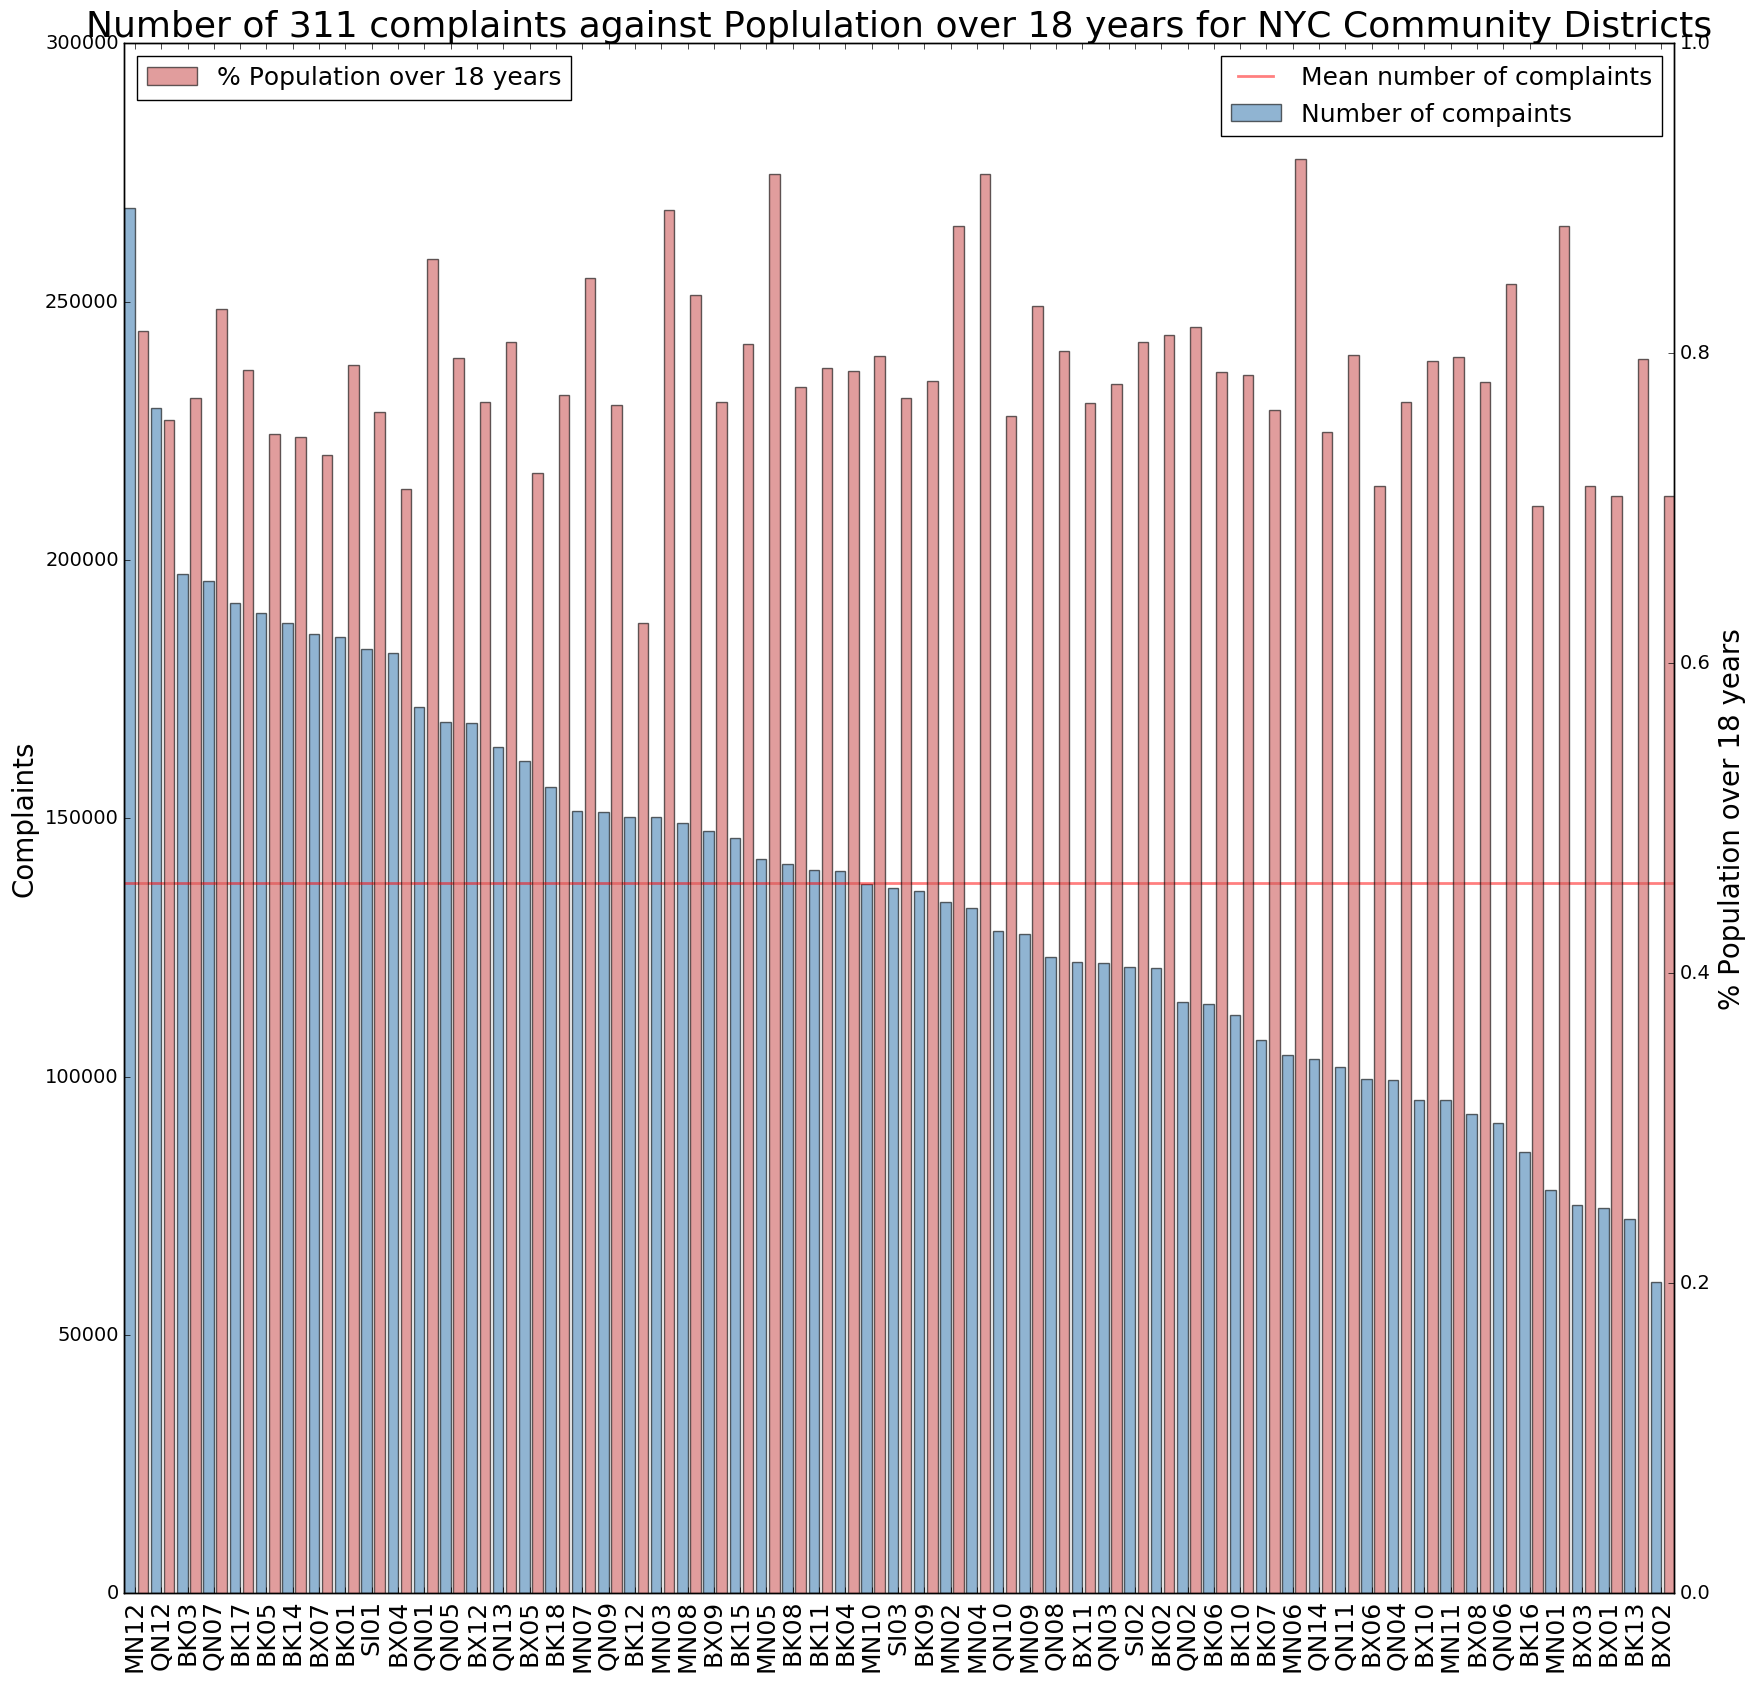

In [43]:
label_range = np.arange(0,len(final_df.key))
labels = np.array(final_df.key.astype(str))

fig, ax1 = plt.subplots(figsize=(20,20), facecolor='white')
ax1.set_title('Number of 311 complaints against Poplulation over 18 years for NYC Community Districts', size = 26)
ax1.bar(np.arange(0,2*len(final_df.key),2),final_df.complaints, color = 'steelblue', \
        alpha = 0.6, label = 'Number of compaints')
ax1.set_xticks(np.arange(0.8,2*len(final_df.key),2))
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(labels, rotation='vertical', size=18)
ax1.set_ylabel('Complaints', size=20)
ax1.axhline(y=final_df.complaints.mean(), color='red', lw=2, alpha=0.5, label = "Mean number of complaints")
ax1.legend(loc = 0, prop={'size':18})
ax2 = ax1.twinx()
ax2.bar(np.arange(1,2*len(final_df.key),2),(final_df['p_18andover']/final_df['Total Population']), 
       color = 'indianred', alpha = 0.6, label = '% Population over 18 years')
ax2.set_ylabel('% Population over 18 years', size=20)
ax2.tick_params(labelsize=14)
ax2.legend(loc=2, prop={'size':18})

## Figure 1: Number of 311 complaints and Population over 18 years in NYC community districts. 

In [44]:
# try to regress with all demographic data by age group, one by one
slope = []
for cols in final_df.columns[4:9]:
    lm = smf.ols('complaints ~'+cols, data=final_df).fit()
    slope.append((lm.params[1],lm.params[0]))
    print 'slope for ' + cols + ' is ' + str(lm.params[1]) + ', p-value is ' + str(lm.pvalues[1]) + ', rsquared is ' \
            + str(lm.rsquared)

slope for p_18andover is 0.69976019537, p-value is 0.000117111996231, rsquared is 0.230927110566
slope for p_44andover is 1.09051827783, p-value is 0.000595533741231, rsquared is 0.18830474314
slope for p_35to44 is 2.82155092561, p-value is 0.00192816177728, rsquared is 0.156486205431
slope for p_25to34 is 1.09563530782, p-value is 0.0479155411517, rsquared is 0.0669060906918
slope for p_18to24 is 2.90524887509, p-value is 0.00757687147247, rsquared is 0.118555368512


#### The r-square id high for popluation over 18 and 44 years as compared to individual age groups. Also the p-values are less than 0.05 so each of them is statistically significant towards complaint numbers.¶

In [45]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?
# try to regress with households with high speed and low speed

lm = smf.ols('complaints ~ High_Speed', data=final_df).fit()
print 'slope for High Speed connection is ' + str(lm.params[1]) + ', p-value is ' + str(lm.pvalues[1]) + ', rsquared is ' \
            + str(lm.rsquared)
lm2 = smf.ols('complaints ~ Low_Speed', data=final_df).fit()
print 'slope for Low Speed connection is ' + str(lm2.params[1]) + ', p-value is ' + str(lm2.pvalues[1]) + ', rsquared is ' \
            + str(lm2.rsquared)

slope for High Speed connection is 0.561129411477, p-value is 0.0926372613521, rsquared is 0.048816409191
slope for Low Speed connection is 1.92240976588, p-value is 0.0990471565911, rsquared is 0.047011555733


In [46]:
lm_p = smf.ols('complaints ~ p_44andover + p_18andover', data=final_df).fit()
print lm_p.summary()

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     8.501
Date:                Wed, 16 Nov 2016   Prob (F-statistic):           0.000597
Time:                        13:11:13   Log-Likelihood:                -702.08
No. Observations:                  59   AIC:                             1410.
Df Residuals:                      56   BIC:                             1416.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    5.258e+04   2.14e+04      2.452      

### Regression on addition of high and low speed connection as regressors

                            OLS Regression Results                            
Dep. Variable:             complaints   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.215
Date:                Wed, 16 Nov 2016   Prob (F-statistic):             0.0477
Time:                        13:11:13   Log-Likelihood:                -706.69
No. Observations:                  59   AIC:                             1419.
Df Residuals:                      56   BIC:                             1426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.827e+04   2.41e+04      3.248      0.0

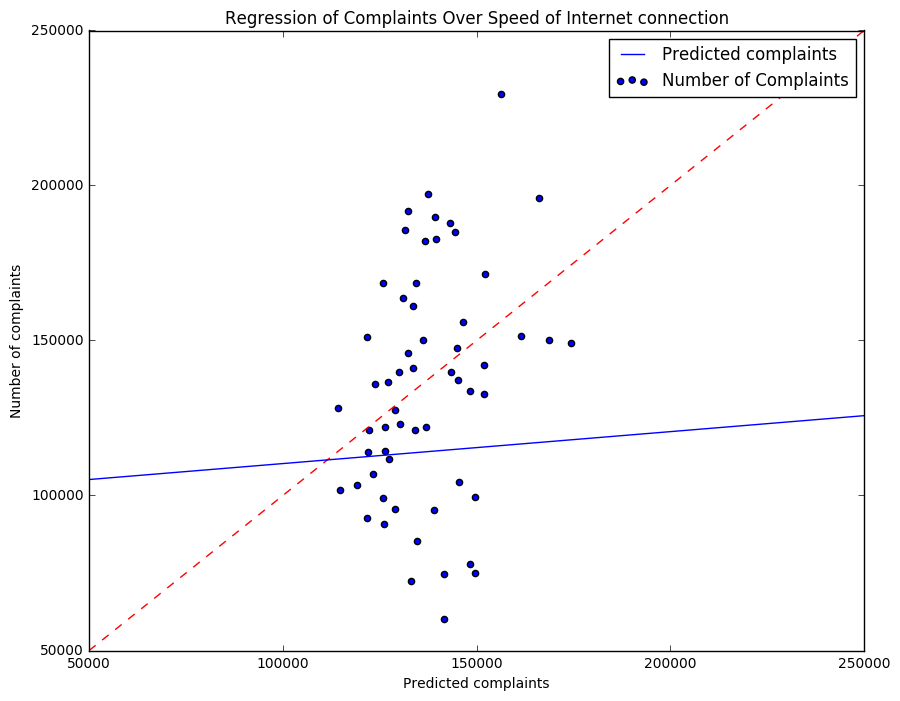

In [47]:
lm1 = smf.ols('complaints ~ High_Speed + Low_Speed', data=final_df).fit()
print lm1.summary()
final_df['Prediction 1'] = lm1.predict()
plt.figure(figsize=(10,8))
plt.scatter(final_df['Prediction 1'],final_df.complaints, label='Number of Complaints')
plt.xlim(50000,250000)
plt.ylim(50000,250000)
plt.plot([50000,250000],[50000,250000],'r--')
x = np.linspace(50000,250000,100)
plt.plot(x,x*lm1.rsquared+100000, label='Predicted complaints')
plt.xlabel('Predicted complaints')
plt.ylabel('Number of complaints')
plt.title("Regression of Complaints Over Speed of Internet connection")
plt.legend()

## Figure 2: Regression over speed of Internet connection
#### The r-square value for internet connection(0.103) is smaller than the population regression(0.233). So there is no strong linear relationship between complaints and number of household with high/low internet connections.